# Content and Objective

+ Illustrate effects of confidence regions
+ Bernoulli experiments are observed and resulting confidence intervals are shown

# Importing

In [1]:
# importing
import numpy as np

from scipy import stats, special


import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# number of confidence regions
N_trials = int( 1e2 )

# P(1)
p = .6

# deviation 
delta = 0.1

# niveau of interval
alpha = .05

# observation length
N = 100 

In [4]:
# sample
X_samples = np.random.choice( [0,1], size=(N, N_trials), p=[1-p, p] )

# determine average
X_average = np.average( X_samples, axis=0 )
S_N = N * X_average


### Tschebyscheff approach

In [5]:
# create intervals using Tschebyscheff approach
intervals_Tschebyscheff_upper = X_average + delta
intervals_Tschebyscheff_lower = X_average - delta

intervals_Tschebyscheff = np.zeros( ( N_trials, 2 ) )
intervals_Tschebyscheff[ :, 0 ] = intervals_Tschebyscheff_lower
intervals_Tschebyscheff[ :, 1 ] = intervals_Tschebyscheff_upper


# determine probability that confidence interval contains real value
count = 0

for ind_i, val_i in enumerate( intervals_Tschebyscheff ):
    count += int( val_i[0] <= p <= val_i[1] )

print( ' P( interval covers p ) = {}'.format( count/N_trials) )


 P( interval covers p ) = 0.99


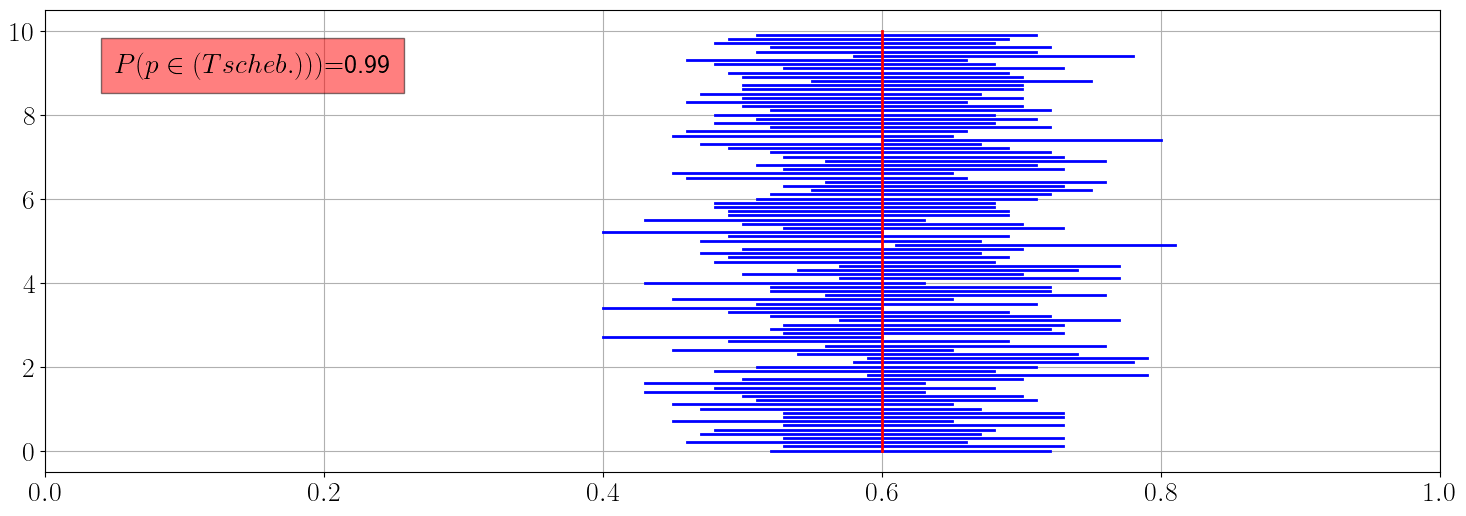

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

for ind_i, val_i in enumerate( intervals_Tschebyscheff ):
    plt.plot( [ val_i[0], val_i[1] ],  [ind_i * .1, ind_i * 0.1], 'b', linewidth=2.0 )

plt.plot( [ p, p ], [ 0, 0.1 * len( intervals_Tschebyscheff ) ], 'r', linewidth = 2.0 )

ax.text( 0.05, 9, r'$P( p \in (Tscheb.)))$={}'.format(count/N_trials), bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10} )

plt.xlim( 0, 1)
plt.grid( 1 )

### CLT Approach

In [7]:
# find 1-alpha/2 quantile
z = stats.norm.ppf( 1-alpha/2 )

# determine lower (untere: u) and upper (obere: o) bound
G_u = 1/( N + z**2) * ( S_N + z**2 / 2 - z*np.sqrt( S_N*(N-S_N) / N + z**2/4 ) )
G_o = 1/( N + z**2) * ( S_N + z**2 / 2 + z*np.sqrt( S_N*(N-S_N) / N + z**2/4 ) )

# find according intervals
intervals_clt = np.zeros( ( N_trials, 2 ) )
intervals_clt[ :, 0 ] = G_u
intervals_clt[ :, 1 ] = G_o

In [8]:
# determine probability that confidence interval contains real value
count_clt = 0

for ind_i, val_i in enumerate( intervals_clt ):
    count_clt += int( val_i[0] <= p <= val_i[1] )

print( ' P( interval covers p ) = {}'.format( count_clt/N_trials) )


 P( interval covers p ) = 0.95


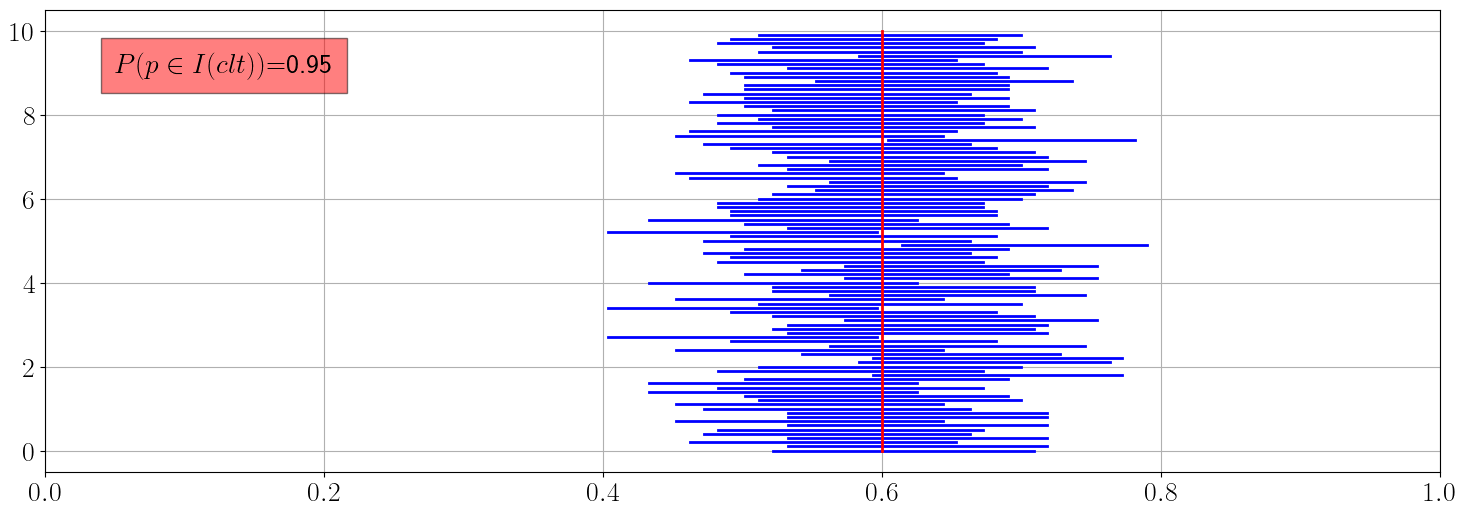

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

for ind_i, val_i in enumerate( intervals_clt ):
    plt.plot( [ val_i[0], val_i[1] ],  [ind_i * .1, ind_i * 0.1], 'b', linewidth=2.0 )

plt.plot( [ p, p ], [ 0, 0.1 * len( intervals_clt ) ], 'r', linewidth = 2.0 )

ax.text( 0.05, 9, r'$P( p \in I(clt))$={}'.format( count_clt/N_trials ), bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10} )

plt.xlim( 0, 1)
plt.grid( 1 )